<a href="https://colab.research.google.com/github/Taiga-U/bug-free-umbrella/blob/main/makegraphs2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
from google.colab import files
files.upload()

Saving accum.dat to accum.dat


{'accum.dat': b'   1   16     0.0100000   17        12555  2.144365e+01   -5.456037e-01  3.254048e-05   7.536765e-04  9.226652e-05   1.396120e+02  2.114145e-01   8.255679e+01  6.085789e-02   5.427909e+00  6.879901e-03   5.736615e+01  1.151937e-01   3.014006e-01  2.122744e-04   1.789020e-01  1.728533e-04  1.323096e+01  2.594300e-02  1.050217e+01  8.899938e-03  6.896696e+00  0.000000e+00  2.976931e+03  2.505521e-01\n   1   16     0.0200000   17         6505  1.059788e+01   -5.456301e-01  4.406636e-05   1.641659e-02  2.328509e-04   1.309220e+02  2.043696e-01   3.590529e+01  4.868425e-02   5.444413e+00  7.607217e-03   5.756766e+01  1.247445e-01   3.015061e-01  2.888383e-04   1.784995e-01  1.159462e-04  1.294526e+01  2.391950e-02  1.051711e+01  1.156036e-02  6.915578e+00  0.000000e+00  7.441674e+02  8.501901e-02\n   1   16     0.0500000   17         2813  4.339825e+00   -5.452790e-01  7.010245e-05   5.042325e-02  2.930493e-04   8.156629e+01  1.209192e-01   7.141453e+00  8.195303e-03   5.437

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.optimize import curve_fit

In [37]:
data = np.loadtxt("./accum.dat")

In [39]:
temp = data[0:34,2]
print(temp)

energy16 = data[0:34,6]
energy_err16 = data[0:34,7]
energy32 = data[9:18,6]
energy_err32 = data[9:18,7]
energy64 = data[18:27,6]
energy_err64 = data[18:27,7]


usus16 = data[0:34,8]
usus_err16 = data[0:34,9]
usus32 = data[9:18,8]
usus_err32 = data[9:18,9]
usus64 = data[18:27,8]
usus_err64 = data[18:27,9]


ssus16 = data[0:34,10]
ssus_err16 = data[0:34,11]
ssus32 = data[9:18,10]
ssus_err32 = data[9:18,11]
ssus64 = data[18:27,10]
ssus_err64 = data[18:27,11]


dynamic_S16 = data[0:34,12]
dynamic_S_err16 = data[0:34,13]
dynamic_S32 = data[9:18,12]
dynamic_S_err32 = data[9:18,13]
dynamic_S64 = data[18:27,12]
dynamic_S_err64 = data[9:27,13]


static_S16 = data[0:34,14]
static_S_err16 = data[0:9,15]
static_S32 = data[9:18,14]
static_S_err32 = data[9:18,15]
static_S64 = data[18:27,14]
static_S_err64 = data[18:27,15]


Nz16 = data[0:34,16]
Nz_err16 = data[0:34,17]
Nz32 = data[9:18,16]
Nz_err32 = data[9:18,17]
Nz64 = data[18:27,16]
Nz_err64 = data[18:27,17]


static_S216 = data[0:34,18]
static_S2_err16 = data[0:34,19]
static_S232 = data[9:18,18]
static_S2_err32 = data[9:18,19]
static_S264 = data[18:27,18]
static_S2_err64 = data[18:27,19]


static_S316 = data[0:34,20]
static_S3_err16 = data[0:34,21]
static_S332 = data[9:18,20]
static_S3_err32 = data[9:18,21]
static_S364 = data[18:27,20]
static_S3_err64 = data[18:27,21]


inverse_gap16 = data[0:34,22]
inverse_gap_err16 = data[0:34,23]
inverse_gap32 = data[9:18,22]
inverse_gap_err32 = data[9:18,23]
inverse_gap64 = data[18:27,22]
inverse_gap_err64 = data[18:27,23]


correlation_length_x16 = data[0:34,24]
correlation_length_x_err16 = data[0:34,25]
correlation_length_x32 = data[9:18,24]
correlation_length_x_err32 = data[9:18,25]
correlation_length_x64 = data[18:27,24]
correlation_length_x_err64 = data[18:27,25]


correlation_length_y16 = data[0:34,26]
correlation_length_y_err16 = data[0:34,27]
correlation_length_y32 = data[9:18,26]
correlation_length_y_err32 = data[9:18,27]
correlation_length_y64 = data[18:27,26]
correlation_length_y_err64 = data[18:27,27]

[0.01 0.02 0.05 0.08 0.1  0.12 0.15 0.2  0.22 0.25 0.28 0.5  0.8  1.
 1.2  1.4  1.6  1.8  2.   2.2  2.4  2.6  2.8  3.   3.2  3.4  3.6  3.8
 4.   4.2  4.4  4.6  4.8  5.  ]


In [40]:
# 藤井 岳 キュリーワイスフィッティングの関数
def CW_fit(xx,yy,t_low,t_high,M_atom_number):
    temp_range = (t_low<xx)&(xx<t_high)
    
    def line(xx,a,c):
        yy = a*xx + c
        return yy
    
    results,err = optimize.curve_fit(line, xx[temp_range], yy[temp_range])
    # print(results)
    
    mu = 3*1.3806E-16*(1/(results[0]))/(6.022E+23)/(9.274E-21)**2
    # print(mu)
    return np.sqrt(mu/M_atom_number), -results[1]/results[0], results[0], results[1]

def line(xx,a,c):
        yy = a*xx + c
        return yy

In [41]:
#　グラフ微調整
plt.rcParams["font.family"] = "Times New Roman"      #全体のフォントを設定
plt.rcParams["xtick.direction"] = "in"               #x軸の目盛線を内向きへ
plt.rcParams["ytick.direction"] = "in"               #y軸の目盛線を内向きへ
plt.rcParams["xtick.minor.visible"] = True           #x軸補助目盛りの追加
plt.rcParams["ytick.minor.visible"] = True           #y軸補助目盛りの追加
plt.rcParams["xtick.major.width"] = 1.5              #x軸主目盛り線の線幅
plt.rcParams["ytick.major.width"] = 1.5              #y軸主目盛り線の線幅
plt.rcParams["xtick.minor.width"] = 1.0              #x軸補助目盛り線の線幅
plt.rcParams["ytick.minor.width"] = 1.0              #y軸補助目盛り線の線幅
plt.rcParams["xtick.major.size"] = 10                #x軸主目盛り線の長さ
plt.rcParams["ytick.major.size"] = 10                #y軸主目盛り線の長さ
plt.rcParams["xtick.minor.size"] = 5                 #x軸補助目盛り線の長さ
plt.rcParams["ytick.minor.size"] = 5                 #y軸補助目盛り線の長さ
plt.rcParams["font.size"] = 14                       #フォントの大きさ
plt.rcParams["axes.linewidth"] = 1.5                 #囲みの太さ


以下、個別にグラフを生成

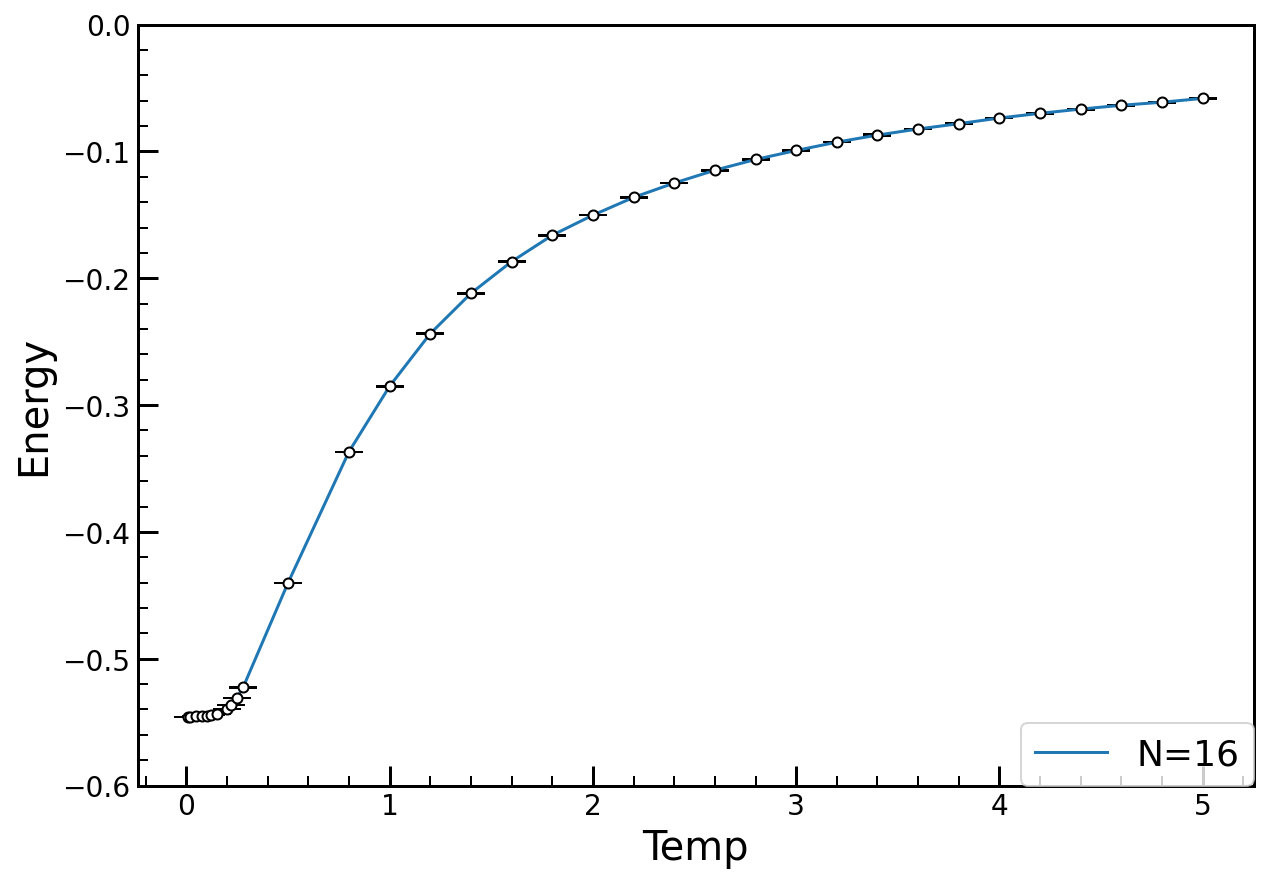

In [43]:
x = temp
y16 = energy16
y_err16 = energy_err16

plt.figure(figsize=(10,7))
plt.errorbar(x, y16, yerr = y_err16, capsize=7, fmt='o', markersize=5, ecolor='black', markeredgecolor = "black", color='w')

plt.plot(x, y16,label="N=16")

plt.ylim(-0.6,0)

plt.xlabel('Temp', fontsize=20)
plt.ylabel('Energy', fontsize=20)

plt.legend(loc=4, borderaxespad=0, fontsize=18)

# plt.savefig('y_error_bar.png')

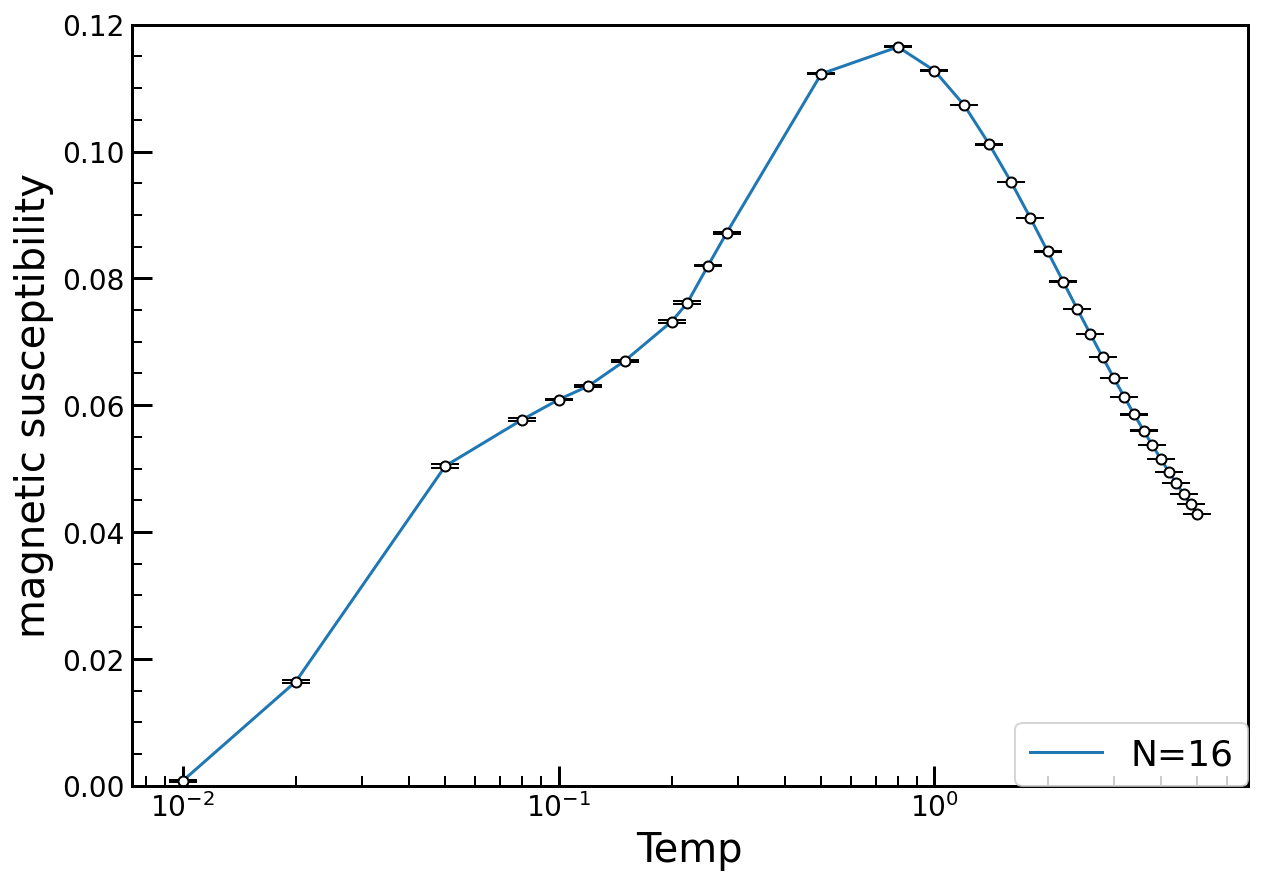

In [44]:
x = temp
y16 = usus16
y_err16 = usus_err16
plt.figure(figsize=(10,7))
plt.errorbar(x, y16, yerr = y_err16, capsize=7, fmt='o', markersize=5, ecolor='black', markeredgecolor = "black", color='w')
plt.plot(x, y16,label="N=16")

plt.ylim(0,0.12)
# plt.xlim(0.0,5.0)

plt.xlabel('Temp', fontsize=20)
plt.ylabel('magnetic susceptibility', fontsize=20)
plt.xscale('log')

plt.legend(loc=4, borderaxespad=0, fontsize=18)
# plt.savefig('y_error_bar.png')

Text(3, 3, 'C = 3.721')

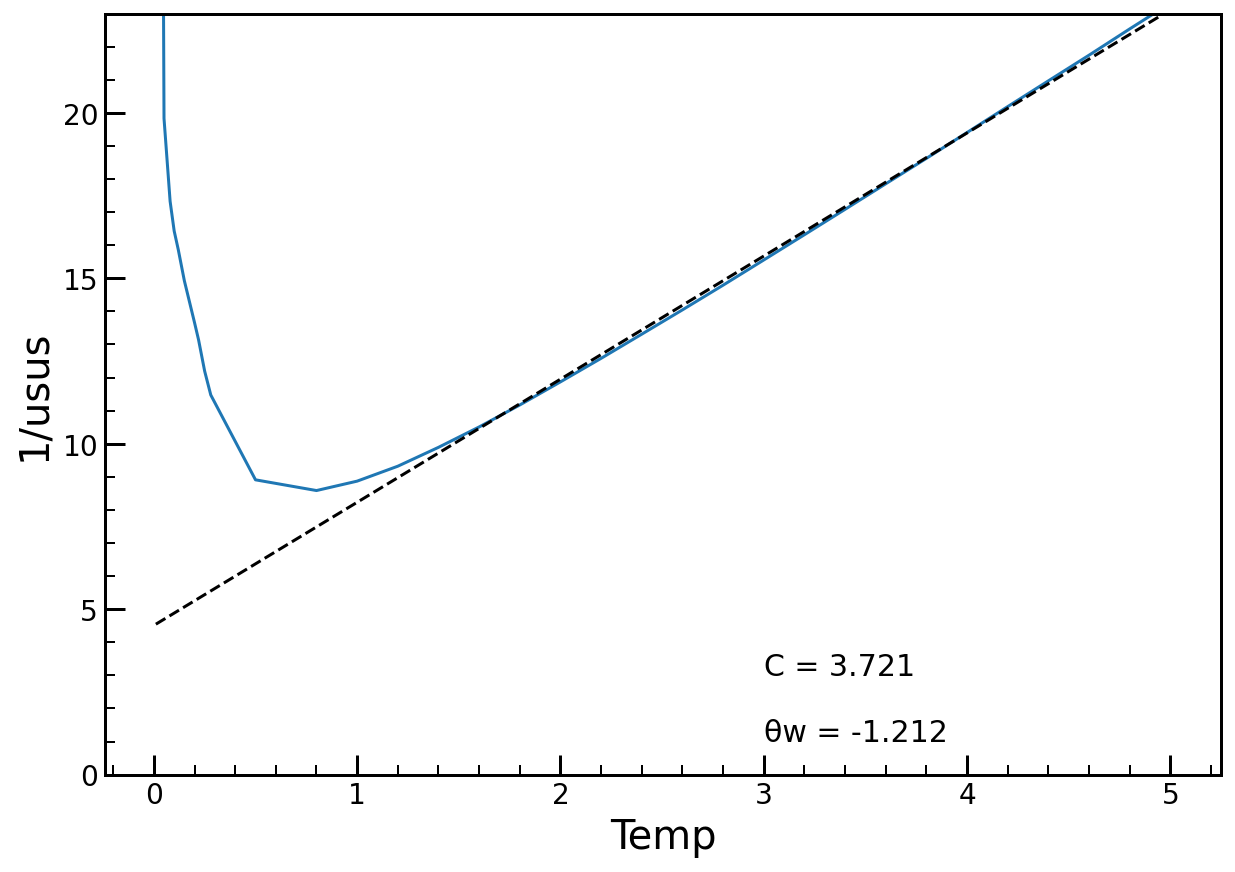

In [47]:
x = temp
y = 1/usus16
# y_err = usus_err

plt.figure(figsize=(10,7))

plt.plot(x, y)
plt.ylim(0,23)
# plt.xlim(0.0,5.0)

plt.xlabel('Temp', fontsize=20)
plt.ylabel('1/usus', fontsize=20)
# plt.xscale('log')

chaifit = CW_fit(x,y,1,5,1)
xx = temp
yy = chaifit[2]*xx + chaifit[3]
plt.plot(xx,yy,"--",color = "0")
plt.text(3,1,"θw = {}".format(round(chaifit[1],3)),fontsize=15)
plt.text(3,3,"C = {}".format(round(chaifit[2],3)),fontsize=15)

# plt.savefig('y_error_bar.png')

Text(0, 0.5, 'staggered susceptibility')

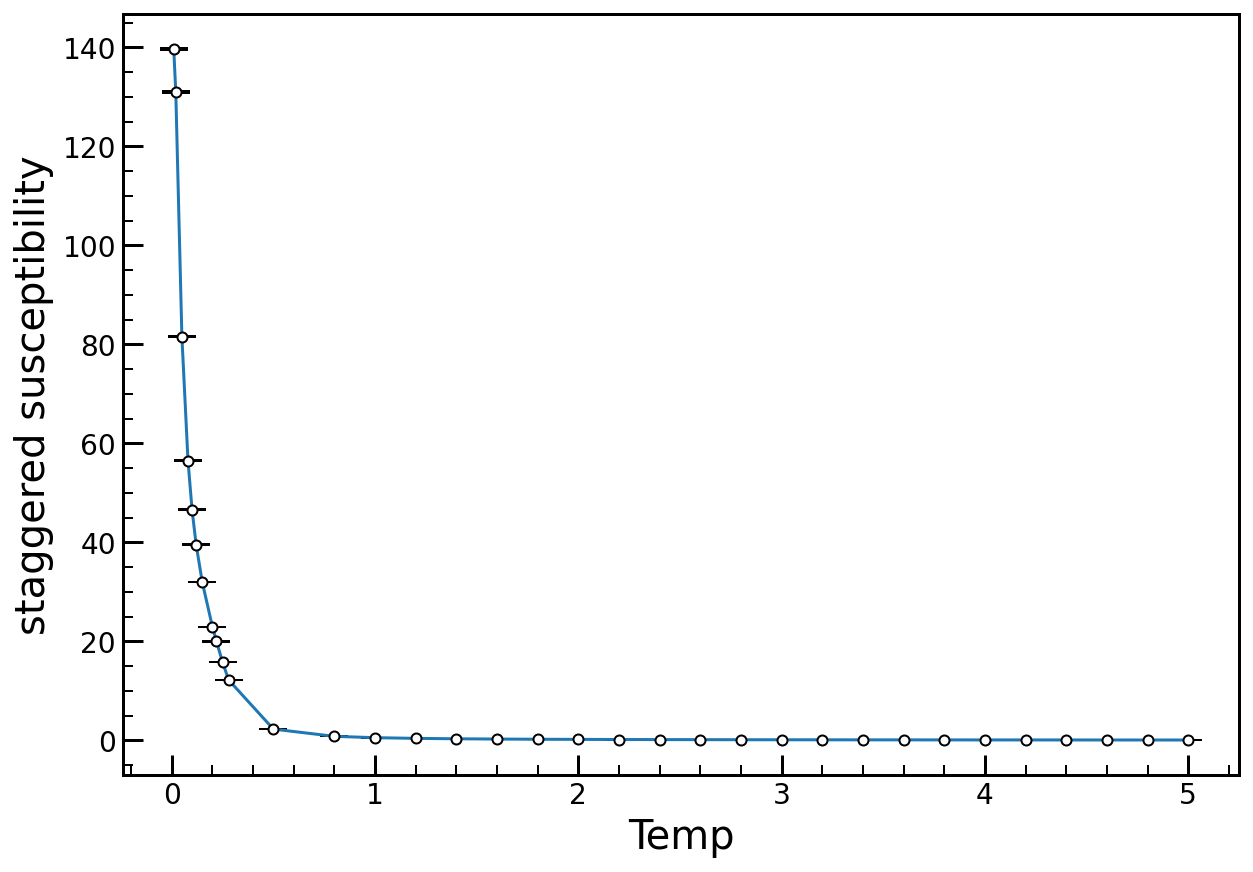

In [50]:
x = temp
y = ssus16
y_err = ssus_err16

plt.figure(figsize=(10,7))
plt.errorbar(x, y, yerr = y_err, capsize=7, fmt='o', markersize=5, ecolor='black', markeredgecolor = "black", color='w')
# plt.ylim(0,0.12)
# plt.xlim(0.0,5.0)
plt.plot(x,y)

plt.xlabel('Temp', fontsize=20)
plt.ylabel('staggered susceptibility', fontsize=20)


# plt.savefig('y_error_bar.png')

Text(0, 0.5, 'dynamic structure factor S($\\pi$,$\\pi$,2$\\pi$/$\\beta$)')

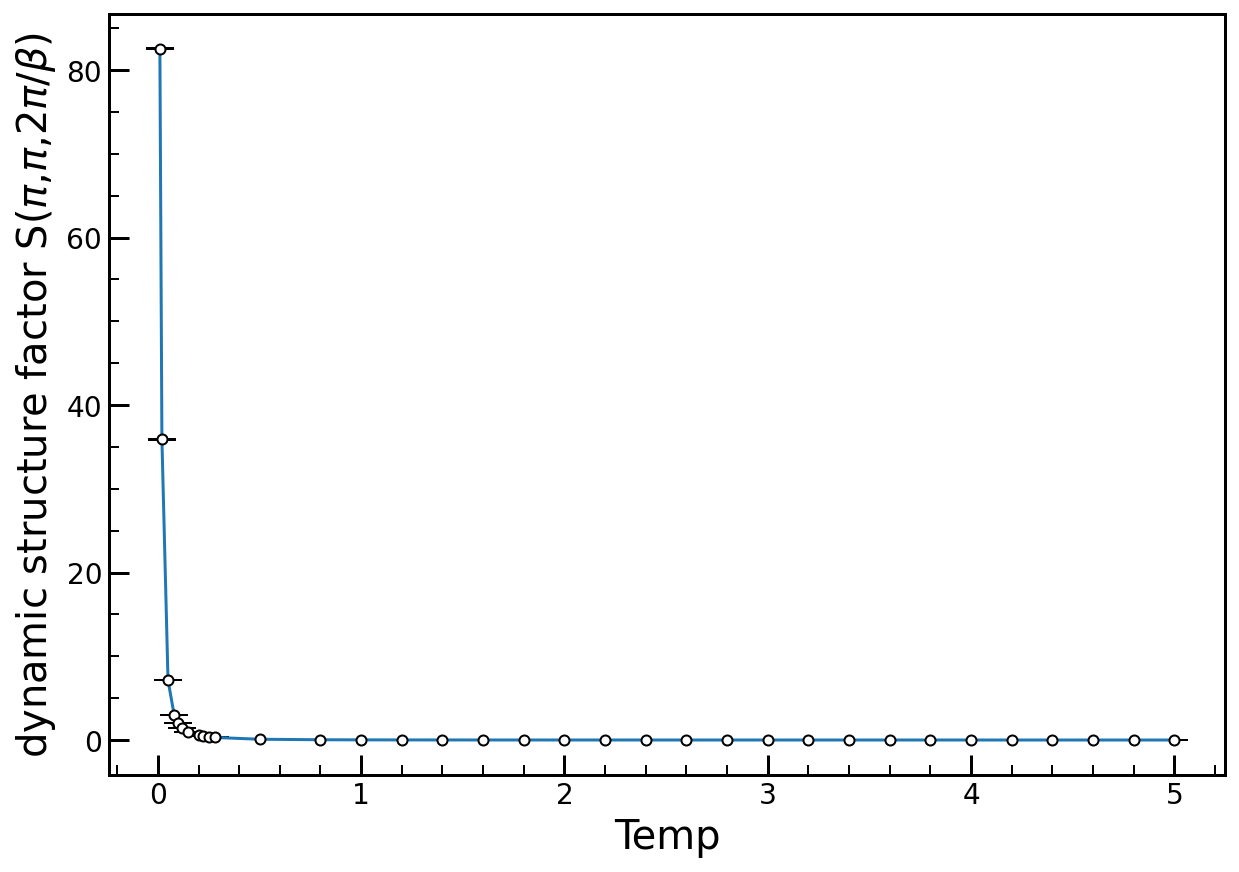

In [60]:
x = temp
y = dynamic_S16
y_err = dynamic_S_err16

plt.figure(figsize=(10,7))
plt.errorbar(x, y, yerr = y_err, capsize=7, fmt='o', markersize=5, ecolor='black', markeredgecolor = "black", color='w')
# plt.ylim(0,0.12)
# plt.xlim(0.0,5.0)
plt.plot(x,y)

plt.xlabel('Temp', fontsize=20)
plt.ylabel('dynamic structure factor S($\pi$,$\pi$,2$\pi$/$\\beta$)', fontsize=20)


# plt.savefig('y_error_bar.png')

Text(0, 0.5, 'static structure factor S($\\pi$,$\\pi$)')

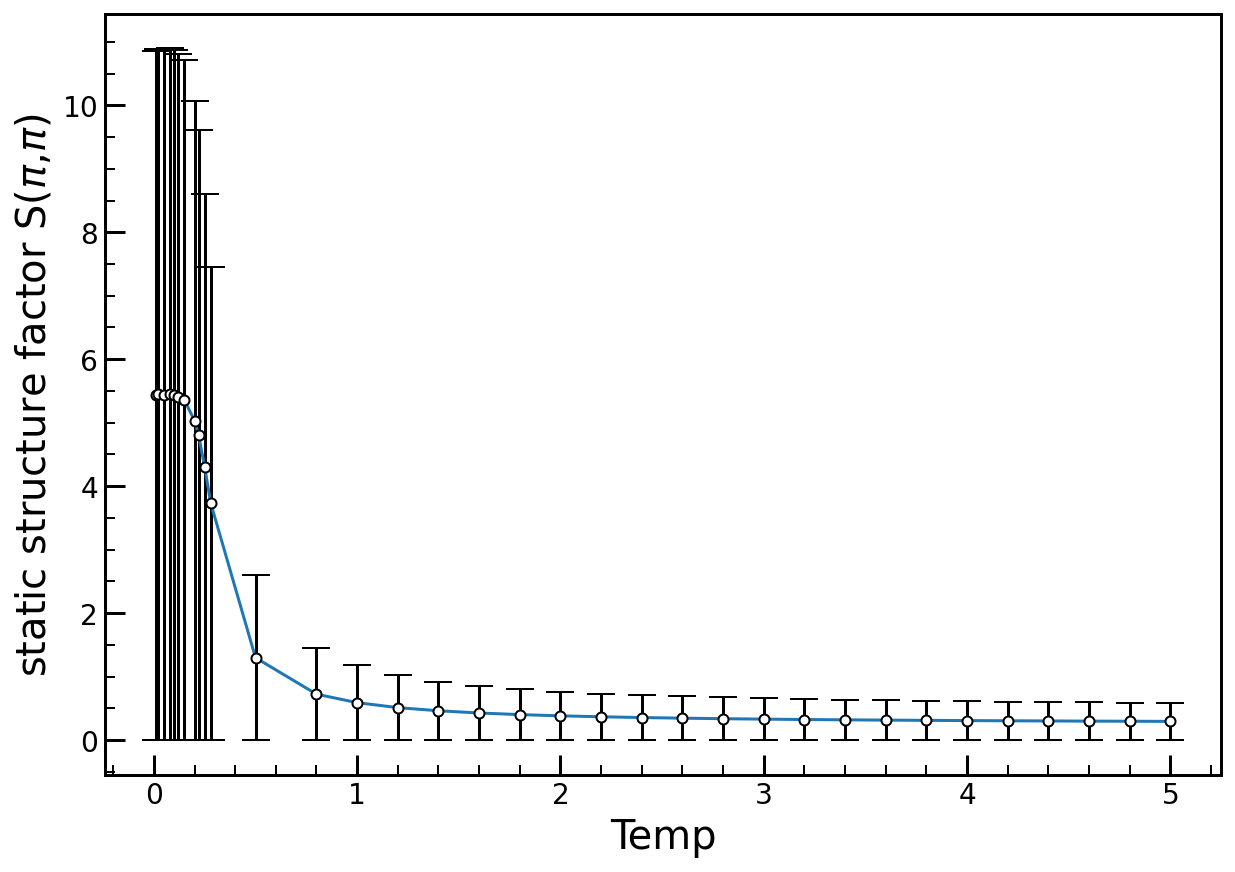

In [64]:
x = temp
y = static_S16
y_err = static_S16

plt.figure(figsize=(10,7))
plt.errorbar(x, y, yerr = y_err, capsize=7, fmt='o', markersize=5, ecolor='black', markeredgecolor = "black", color='w')
# plt.ylim(0,0.12)
# plt.xlim(0.0,5.0)
plt.plot(x,y)

plt.xlabel('Temp', fontsize=20)
plt.ylabel('static structure factor S($\pi$,$\pi$)', fontsize=20)


# plt.savefig('y_error_bar.png')

Text(0, 0.5, '<Nz Nz Nz Nz>')

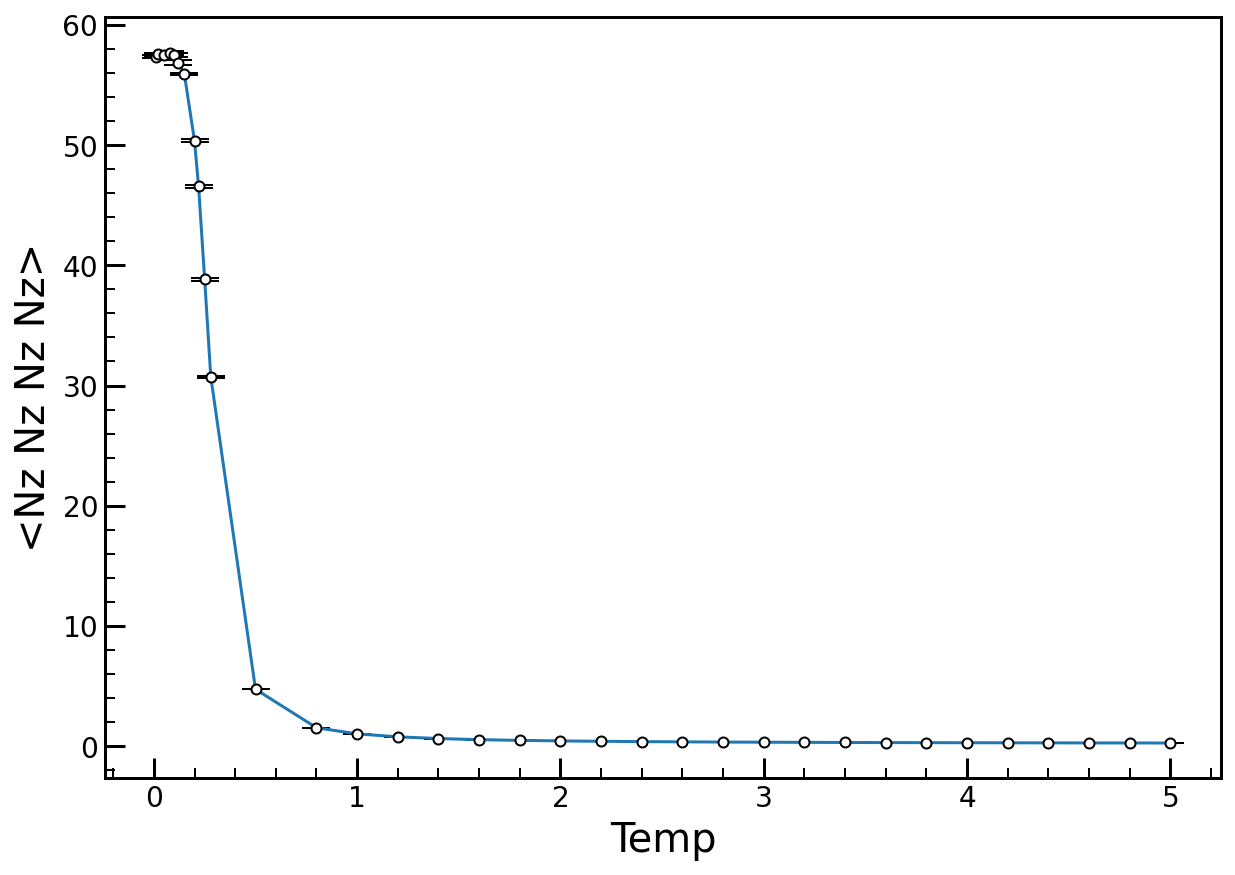

In [66]:
x = temp
y = Nz16
y_err = Nz_err16

plt.figure(figsize=(10,7))
plt.errorbar(x, y, yerr = y_err, capsize=7, fmt='o', markersize=5, ecolor='black', markeredgecolor = "black", color='w')
# plt.ylim(0,0.12)
# plt.xlim(0.0,5.0)
plt.plot(x,y)

plt.xlabel('Temp', fontsize=20)
plt.ylabel('<Nz Nz Nz Nz>', fontsize=20)


# plt.savefig('y_error_bar.png')

Text(0, 0.5, 'static structure factor S($\\pi$+2$\\pi$/L,$\\pi$)')

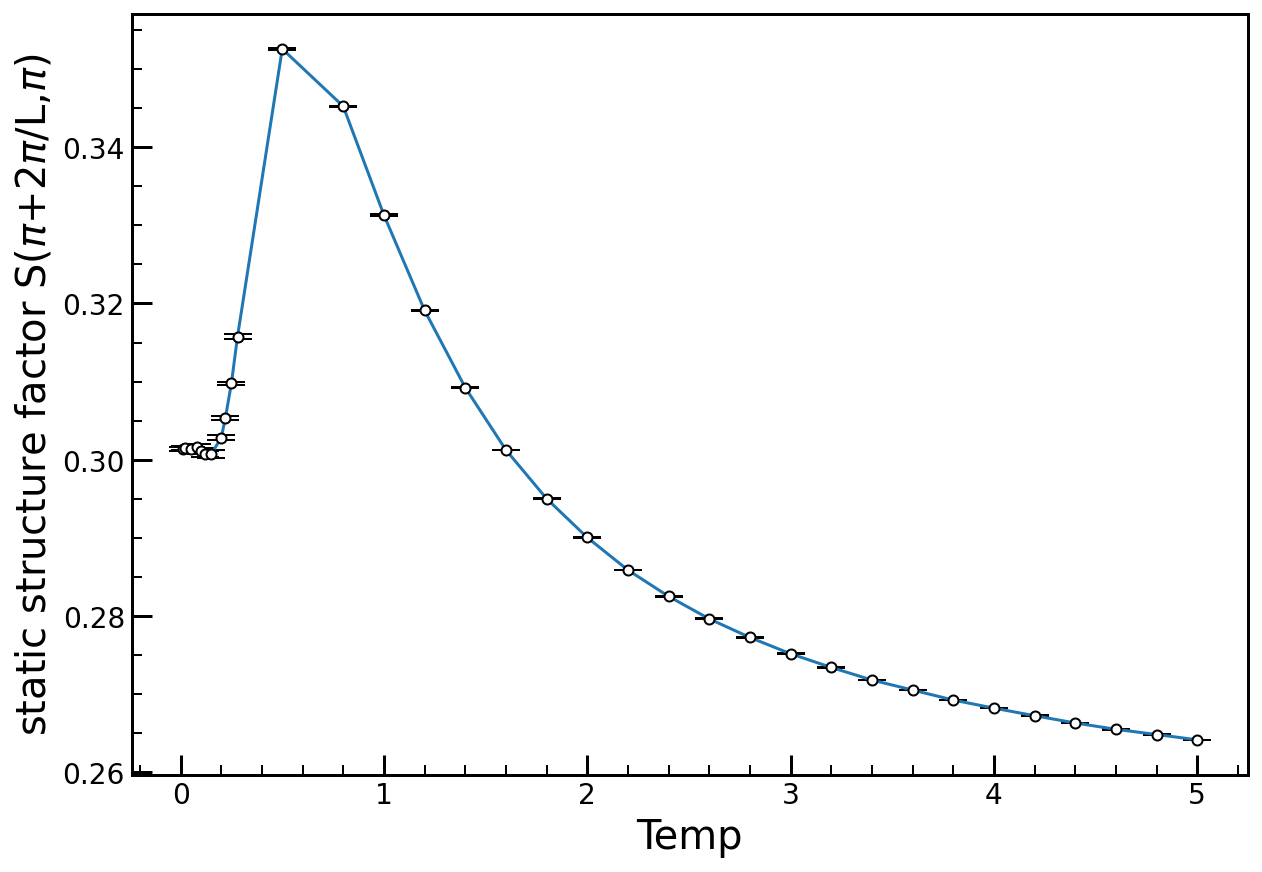

In [68]:
x = temp
y = static_S216
y_err = static_S2_err16

plt.figure(figsize=(10,7))
plt.errorbar(x, y, yerr = y_err, capsize=7, fmt='o', markersize=5, ecolor='black', markeredgecolor = "black", color='w')
# plt.ylim(0,0.12)
# plt.xlim(0.0,5.0)
plt.plot(x,y)

plt.xlabel('Temp', fontsize=20)
plt.ylabel('static structure factor S($\pi$+2$\pi$/L,$\pi$)', fontsize=20)


# plt.savefig('y_error_bar.png')

Text(0, 0.5, 'dynamic structure factor S($\\pi$,$\\pi$+2$\\pi$/L)')

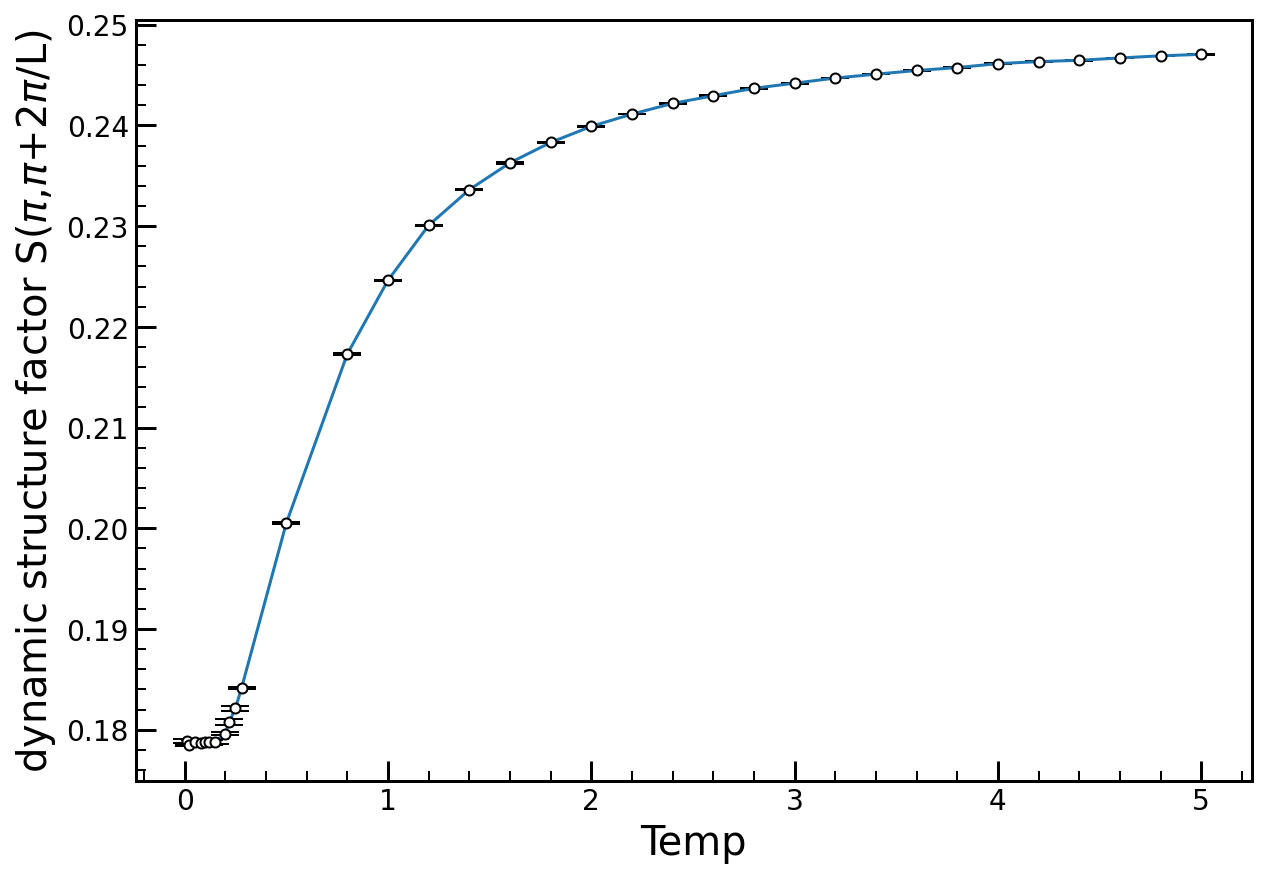

In [70]:
x = temp
y = static_S316
y_err = static_S3_err16

plt.figure(figsize=(10,7))
plt.errorbar(x, y, yerr = y_err, capsize=7, fmt='o', markersize=5, ecolor='black', markeredgecolor = "black", color='w')
# plt.ylim(0,0.12)
# plt.xlim(0.0,5.0)
plt.plot(x,y)

plt.xlabel('Temp', fontsize=20)
plt.ylabel('dynamic structure factor S($\pi$,$\pi$+2$\pi$/L)', fontsize=20)


# plt.savefig('y_error_bar.png')

Text(0, 0.5, '$\\Delta$^-1')

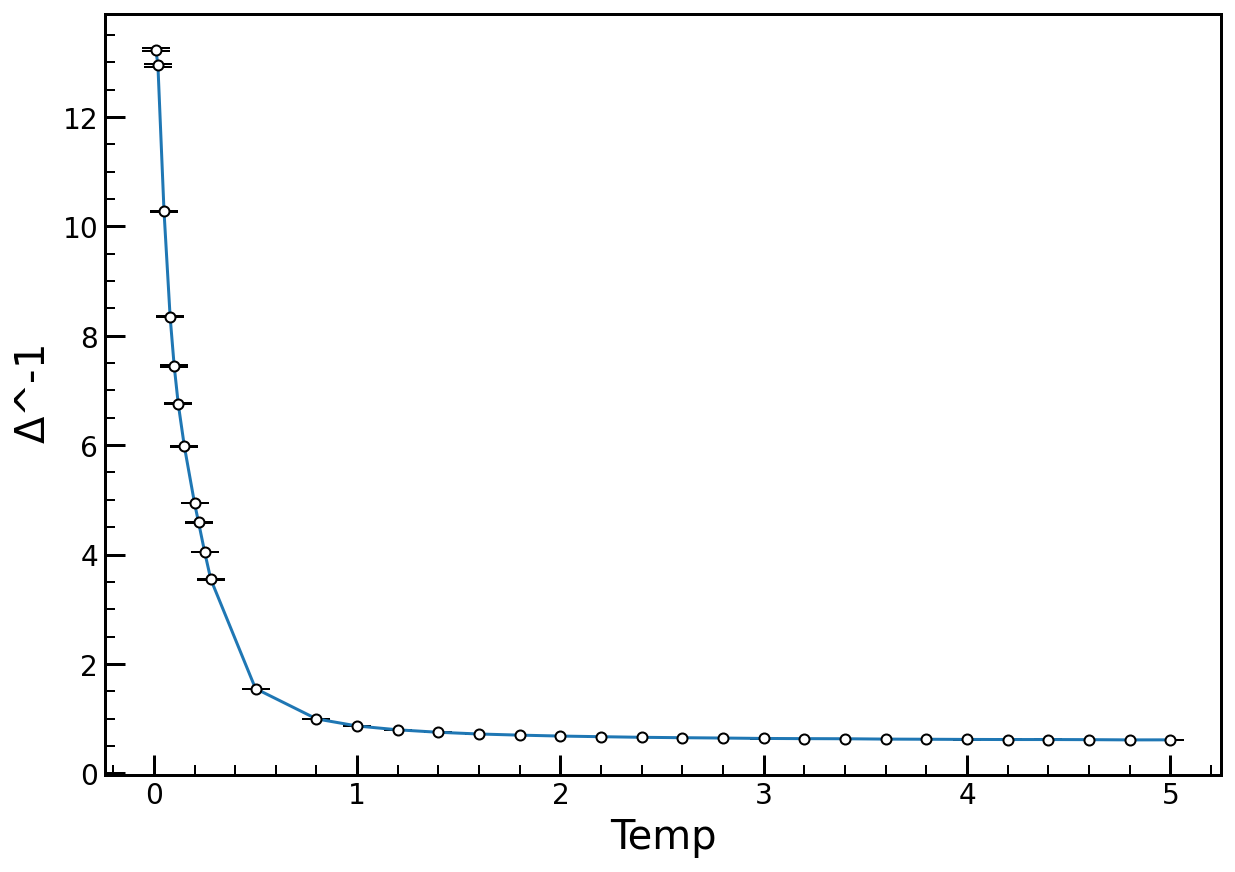

In [72]:
x = temp
y = inverse_gap16
y_err = inverse_gap_err16

plt.figure(figsize=(10,7))
plt.errorbar(x, y, yerr = y_err, capsize=7, fmt='o', markersize=5, ecolor='black', markeredgecolor = "black", color='w')
# plt.ylim(0,0.12)
# plt.xlim(0.0,5.0)
plt.plot(x,y)

plt.xlabel('Temp', fontsize=20)
plt.ylabel('$\Delta$^-1', fontsize=20)


# plt.savefig('y_error_bar.png')

Text(0, 0.5, 'correlation length x')

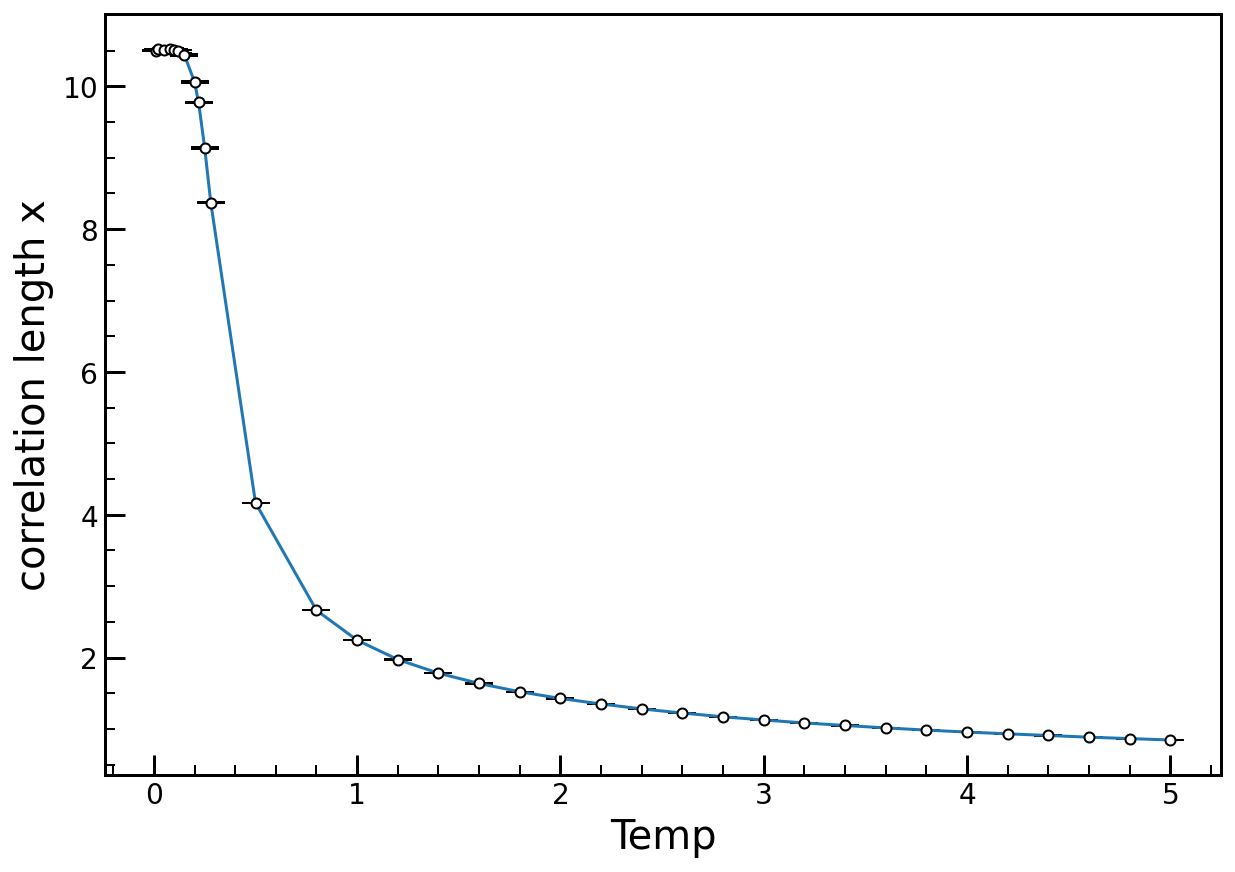

In [73]:
x = temp
y = correlation_length_x16
y_err = correlation_length_x_err16

plt.figure(figsize=(10,7))
plt.errorbar(x, y, yerr = y_err, capsize=7, fmt='o', markersize=5, ecolor='black', markeredgecolor = "black", color='w')
# plt.ylim(0,0.12)
# plt.xlim(0.0,5.0)
plt.plot(x,y)

plt.xlabel('Temp', fontsize=20)
plt.ylabel('correlation length x', fontsize=20)


# plt.savefig('y_error_bar.png')

Text(0, 0.5, 'correlation length y')

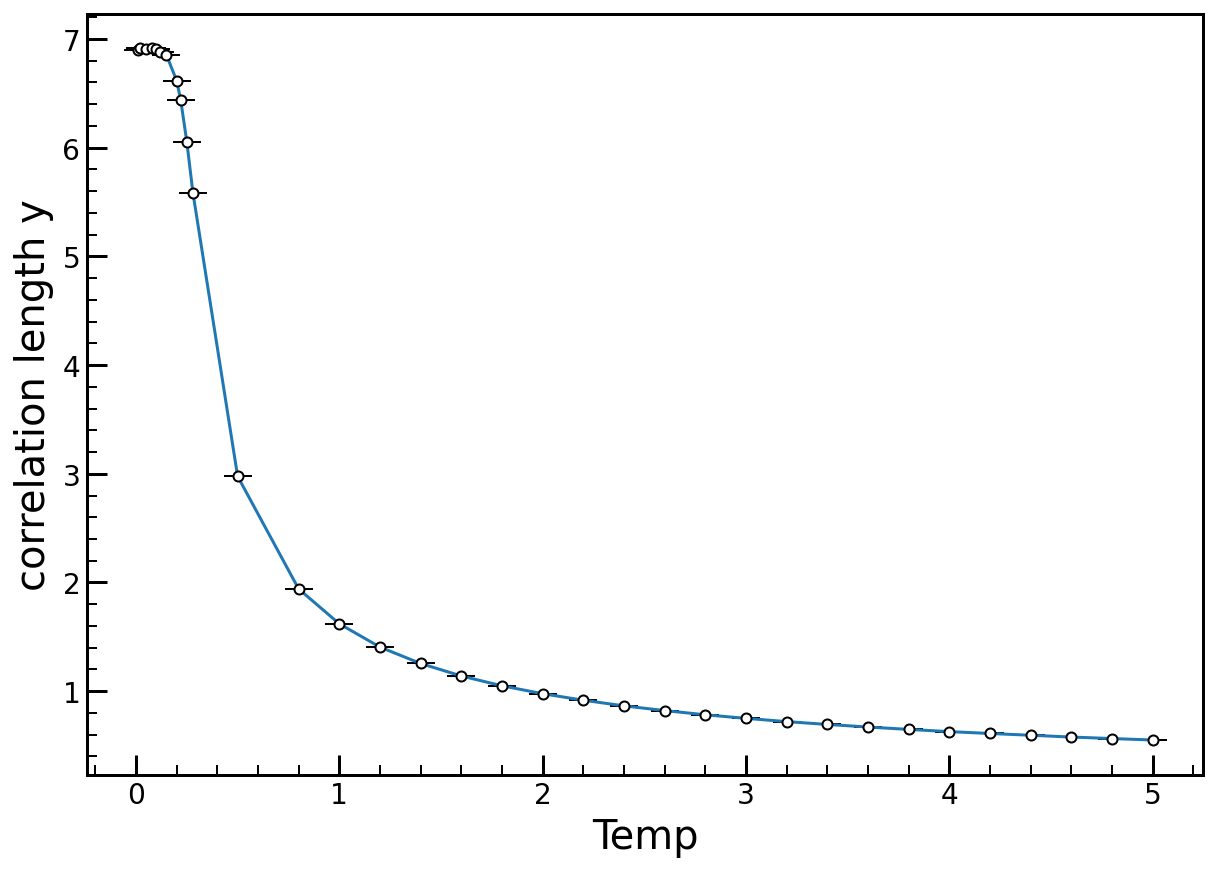

In [74]:
x = temp
y = correlation_length_y16
y_err = correlation_length_y_err16

plt.figure(figsize=(10,7))
plt.errorbar(x, y, yerr = y_err, capsize=7, fmt='o', markersize=5, ecolor='black', markeredgecolor = "black", color='w')
# plt.ylim(0,0.12)
# plt.xlim(0.0,5.0)
plt.plot(x,y)

plt.xlabel('Temp', fontsize=20)
plt.ylabel('correlation length y', fontsize=20)


# plt.savefig('y_error_bar.png')

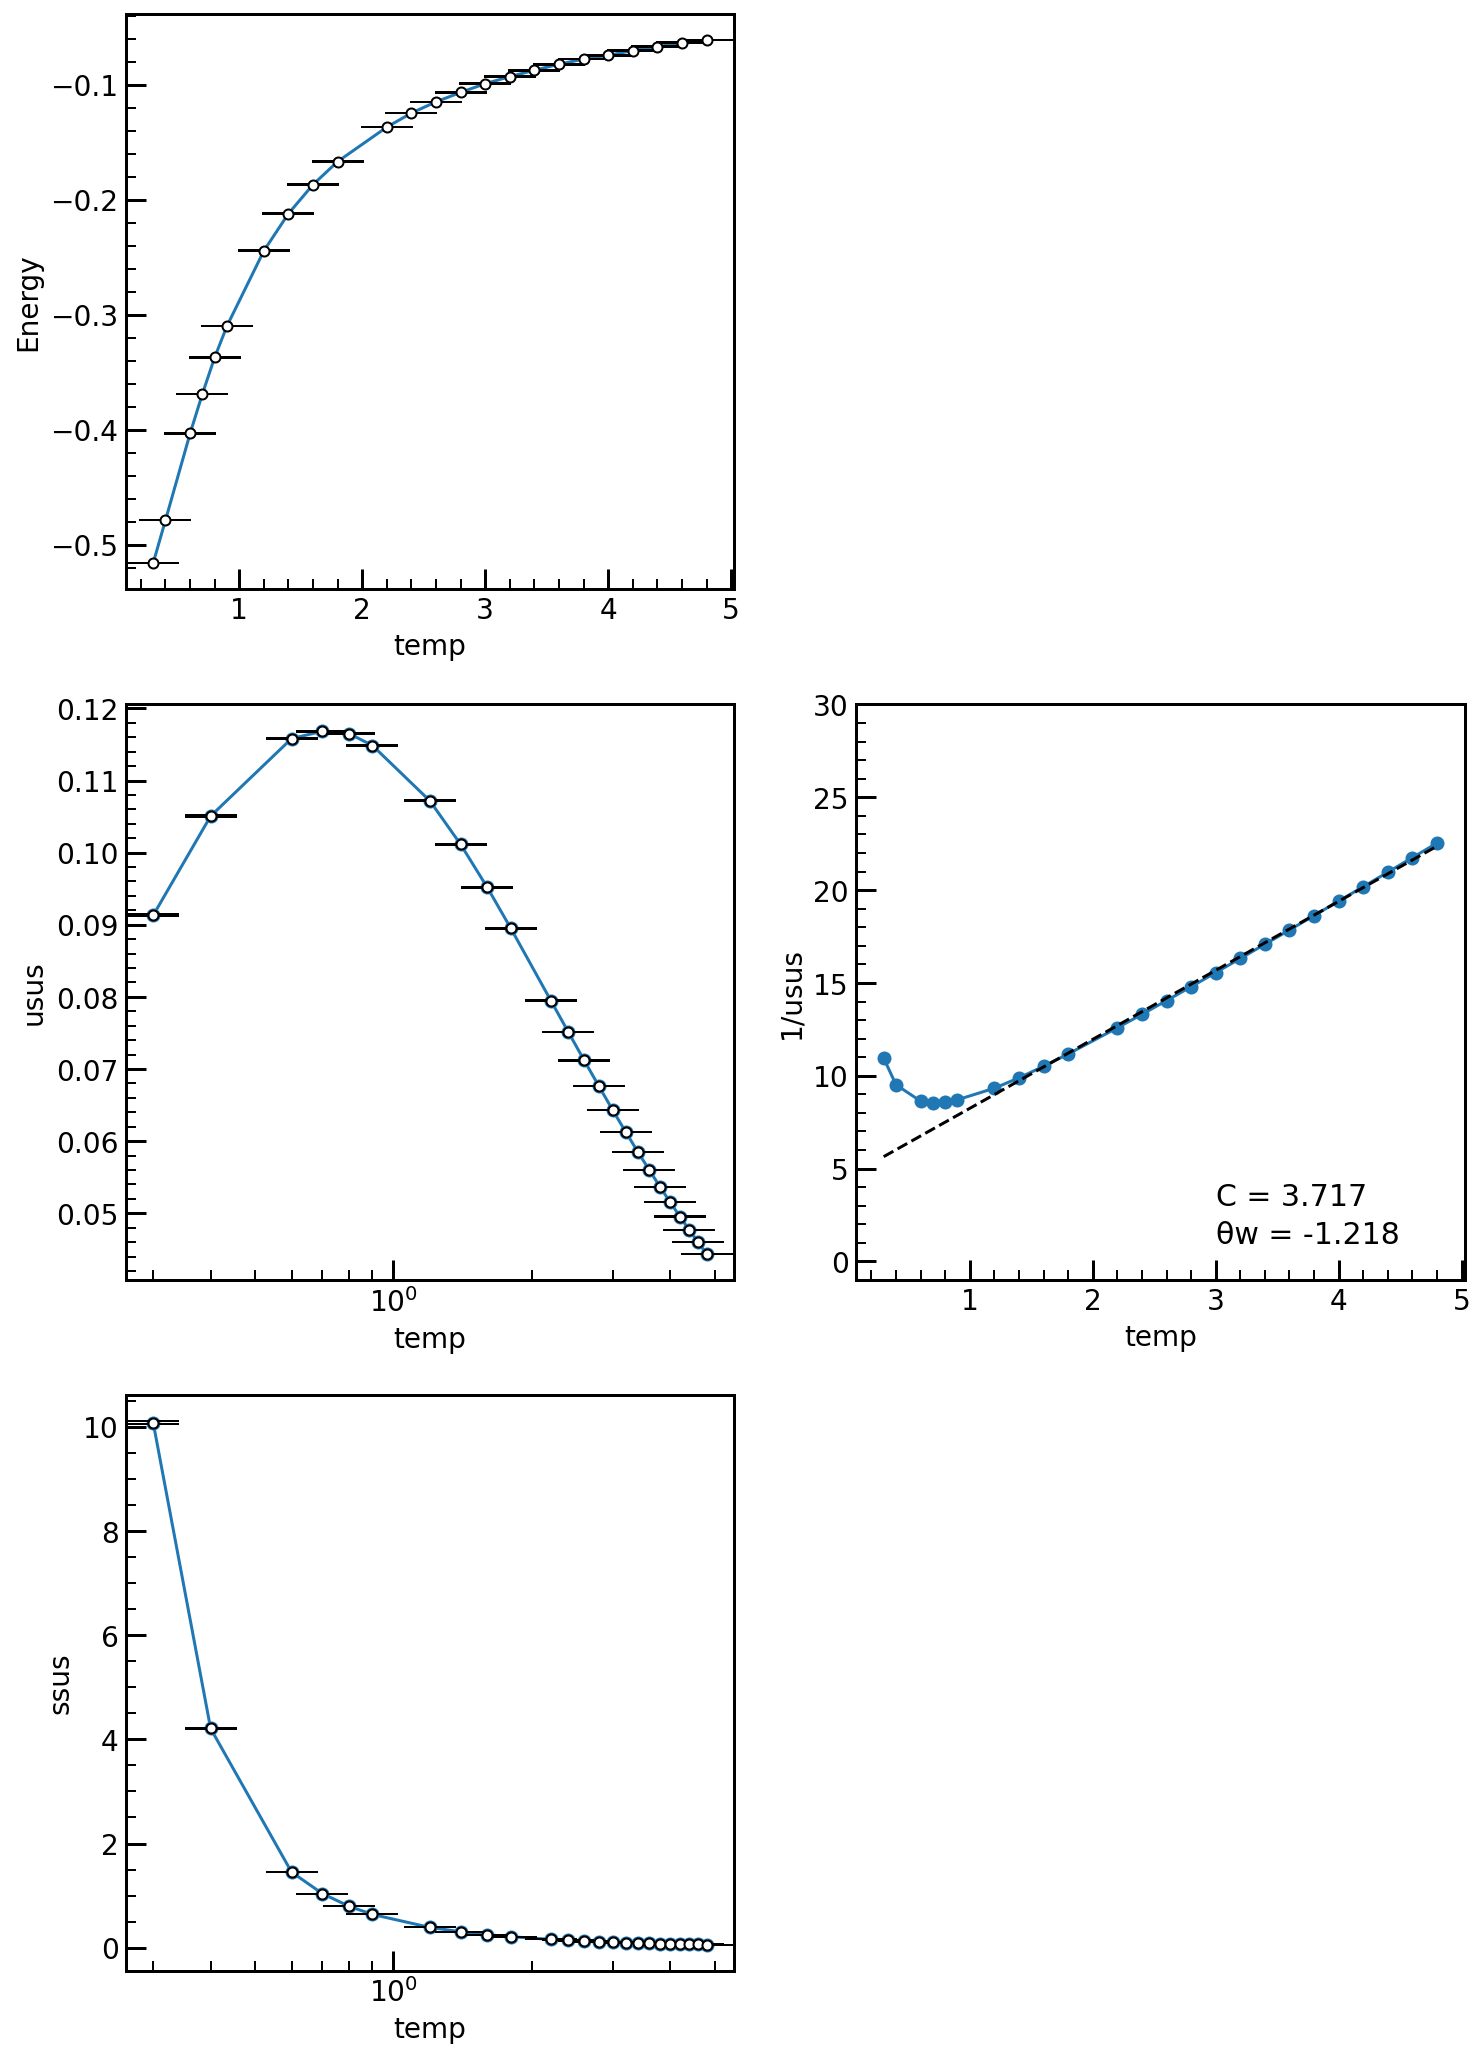

In [ ]:
fig = plt.figure(figsize=(12,18))
gyou = 3
retsu = 2
ax1 = fig.add_subplot(gyou,retsu,1)

ax1.plot(temp, energy)
ax1.errorbar(temp, energy, yerr = energy_err, capsize=13, fmt='o', markersize=5, ecolor='black', markeredgecolor = "black", color='w')
ax1.set_ylabel("Energy")
ax1.set_xlabel("temp")

ax3 = fig.add_subplot(gyou,retsu,3)
ax3.plot(temp, usus, marker ='o', label="test")
ax3.errorbar(temp, usus, yerr = usus_err, capsize=13, fmt='o', markersize=5, ecolor='black', markeredgecolor = "black", color='w')
ax3.set_ylabel("usus")
ax3.set_xscale('log')
ax3.set_xlabel("temp")


ax4 = fig.add_subplot(gyou,retsu,4)
ax4.plot(temp, 1/usus, marker ='o', label="test")
ax4.set_ylabel("1/usus")
ax4.set_xlabel("temp")
ax4.set_ylim(-1,30)
# ax4.set_ylim(-1,22)
#以下は最小二乗法
chaifit = CW_fit(temp,1/usus, 1,5,1)
x = temp
y = chaifit[2]*x + chaifit[3]
ax4.plot(x,y,"--",color = "0")
ax4.text(3,1,"θw = {}".format(round(chaifit[1],3)),fontsize=15)
ax4.text(3,3,"C = {}".format(round(chaifit[2],3)),fontsize=15)

ax5 = fig.add_subplot(gyou,retsu,5)
ax5.plot(temp, ssus, marker ='o', label="test")
ax5.errorbar(temp, ssus, yerr = ssus_err, capsize=13, fmt='o', markersize=5, ecolor='black', markeredgecolor = "black", color='w')
ax5.set_ylabel("ssus")
# ax2.set_xlim(0,1)
ax5.set_xscale('log')
ax5.set_xlabel("temp")

# ax6 = fig.add_subplot(gyou,retsu,6)
# ax6.plot(temp, 1/ssus, marker ='o', label="test")
# ax6.set_ylabel("1/ssus")
# # ax6.set_xscale('log')
# ax6.set_xlabel("temp")
# #以下は最小二乗法
# chaifit = CW_fit(temp,1/ssus, 1,5,1)
# x = temp
# y = chaifit[2]*x + chaifit[3]
# ax6.plot(x,y,"--",color = "0")
# ax6.text(3,1,"θw = {}".format(round(chaifit[1],3)),fontsize=15)
# ax6.text(3,3,"C = {}".format(round(chaifit[2],3)),fontsize=15)

plt.show()

Text(0.5, 0, 'temp')

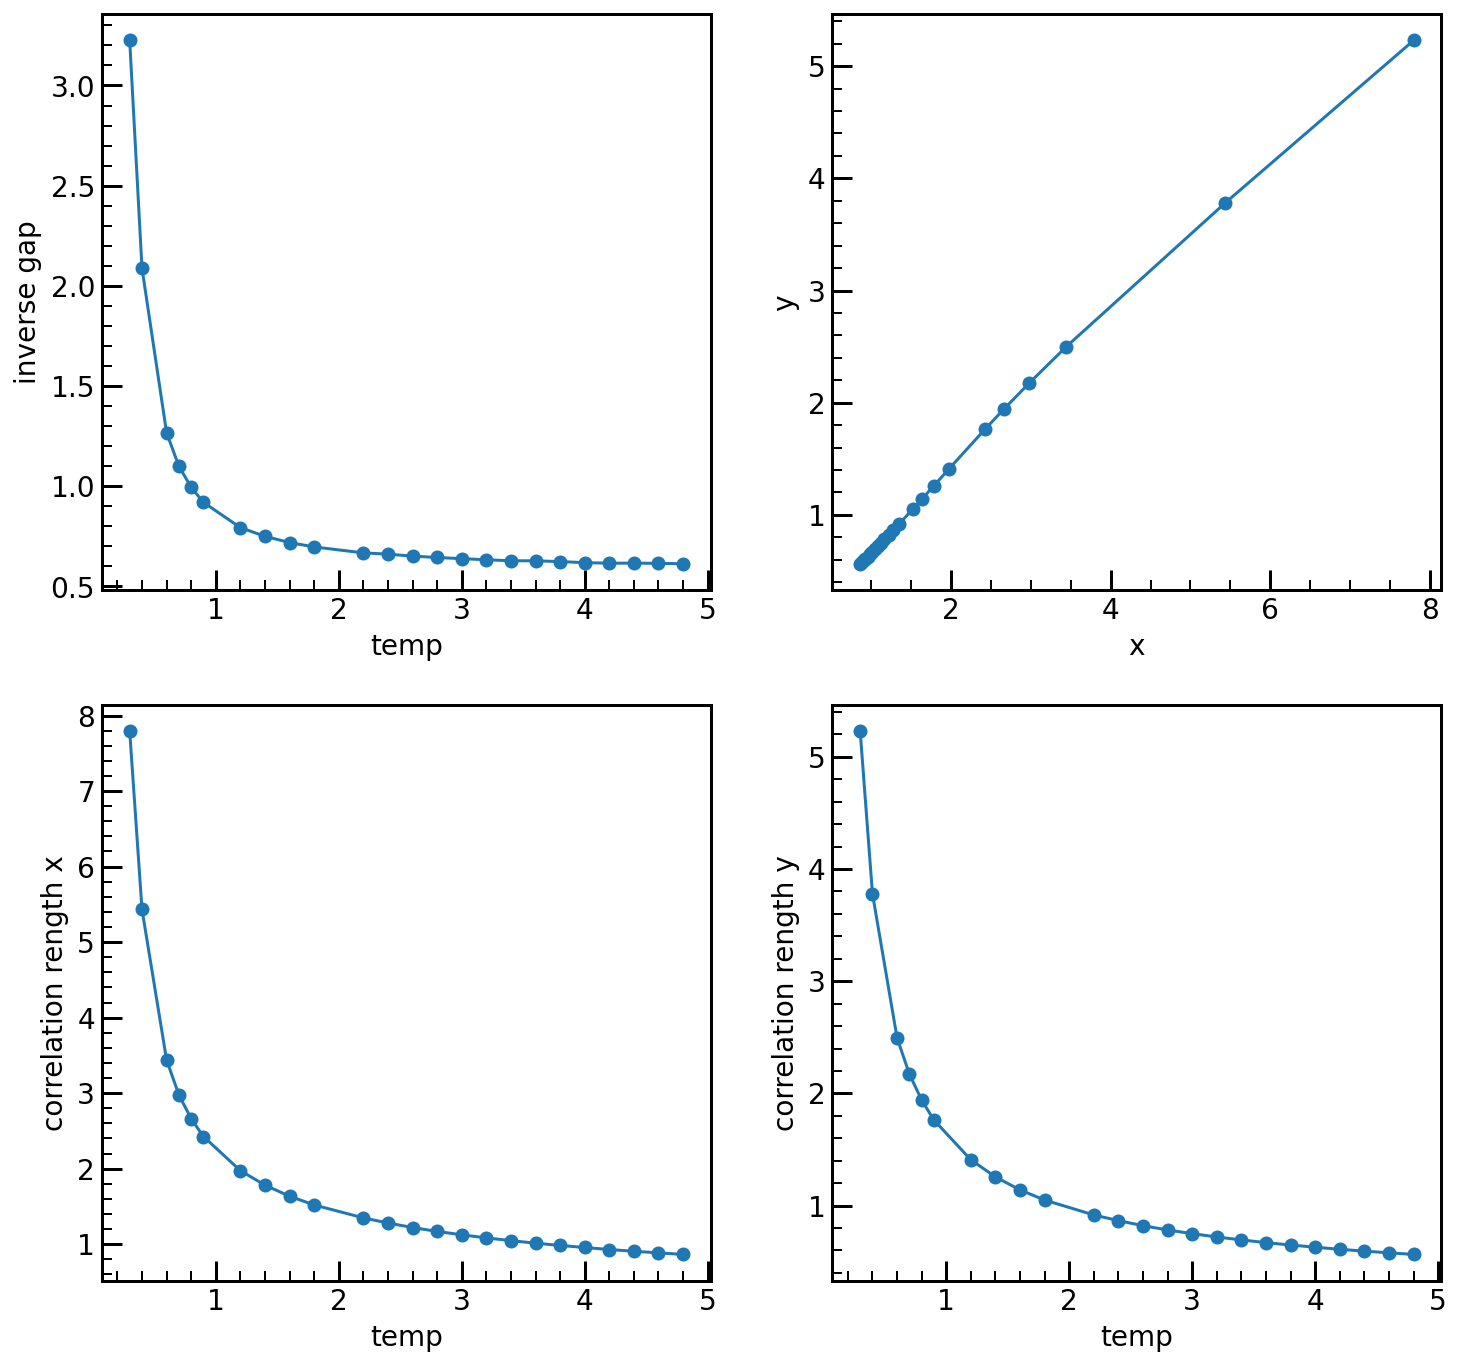

In [ ]:
fig = plt.figure(figsize=(12,18))
gyou = 3
retsu = 2
ax1 = fig.add_subplot(gyou,retsu,1)

ax1.plot(temp, inverse_gap, marker ='o', label="test")
ax1.set_ylabel("inverse gap")
ax1.set_xlabel("temp")

ax2 = fig.add_subplot(gyou,retsu,2)
ax2.plot(correlation_length_x, correlation_length_y, marker ='o', label="test")
ax2.set_ylabel("y")
ax2.set_xlabel("x")

ax2 = fig.add_subplot(gyou,retsu,3)
ax2.plot(temp, correlation_length_x, marker ='o', label="test")
ax2.set_ylabel("correlation rength x")
ax2.set_xlabel("temp")

ax2 = fig.add_subplot(gyou,retsu,4)
ax2.plot(temp, correlation_length_y, marker ='o', label="test")
ax2.set_ylabel("correlation rength y")
ax2.set_xlabel("temp")